In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv
/kaggle/input/churn_prediction/keras/default/1/ann-churn-prediction.ipynb


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int')

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-09-20 08:08:56.982988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758355737.220960      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758355737.288859      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model = Sequential()   # ANN ka skeleton (ek empty model)

# 1st Layer (Hidden Layer)
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
# 2nd Layer (Output Layer)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-20 08:09:10.900866: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5787 - loss: 0.6710 - val_accuracy: 0.7969 - val_loss: 0.4861
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4733 - val_accuracy: 0.8037 - val_loss: 0.4426
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4513 - val_accuracy: 0.8256 - val_loss: 0.4164
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.4260 - val_accuracy: 0.8375 - val_loss: 0.4001
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.3830 - val_accuracy: 0.8425 - val_loss: 0.3868
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3789 - val_accuracy: 0.8394 - val_loss: 0.3754
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3665 - val_accuracy: 0.8450 - val_loss: 0.3687
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3617 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[ 0.00506284, -0.54810685, -0.09264687, -0.10672855,  0.22252822,
          0.01023315,  0.08262903, -0.38630608, -0.21255006, -0.21866186,
          0.02810385],
        [ 0.15043774, -0.29057828,  0.61129993,  0.344646  , -0.8146873 ,
          0.31178448, -0.5422794 ,  0.7254958 , -0.04613586, -0.433058  ,
          0.6694241 ],
        [ 0.0794677 , -0.3865782 ,  0.05005742, -0.07218759, -0.02109901,
          0.42197567,  0.42366874,  0.19511048, -0.01252332, -0.16709246,
         -0.10631115],
        [-0.14742047, -0.10847779, -0.5742085 ,  0.37669048,  0.21463391,
         -0.18589951,  0.04916946, -0.04137697, -0.53176093,  0.6710226 ,
          0.07031251],
        [-1.096755  ,  0.00666547, -0.79287386,  1.156644  , -0.02747992,
          0.36616486, -0.31060424, -0.19968233, -0.20369247, -0.30746296,
          0.64809316],
        [-0.18062863,  0.51186216,  0.09503248, -0.16425878, -0.11539861,
          0.61192536,  0.33001697, -0.08467151, -0.47465587,  0.0293112

In [24]:
model.layers[1].get_weights()

[array([[-0.17011404,  0.18923336, -0.19732773,  0.19004728,  0.05514919,
          0.70876884,  0.5419937 , -0.28263384, -0.22308809, -0.39735794,
         -0.18459255],
        [ 0.2502694 , -0.6150509 ,  0.1351972 ,  0.19122534, -0.17251438,
          0.12959264, -0.07841206,  0.06576   ,  0.47644433, -0.60010517,
          0.679226  ],
        [ 0.01081582, -0.19028975, -0.37649745,  0.53022814,  0.23412308,
          0.21738109,  0.58789796, -0.38848653, -0.3785019 ,  0.35371053,
         -0.66320795],
        [-0.03279349,  0.7107551 , -0.03831815, -0.3234381 , -0.5895445 ,
          0.9314921 ,  0.6646015 , -0.38179958, -0.06511121, -0.38322183,
         -0.11356756],
        [ 0.06825347, -0.00632713,  0.40180957,  0.22035354,  0.38505918,
         -0.31286106, -0.24791762,  0.15359807, -0.19270942,  0.17115518,
          0.32706198],
        [ 0.10217579,  0.38791966,  0.11370723, -1.0621216 , -0.08217581,
          0.14137591,  0.27138224,  0.0781319 ,  0.07866462,  0.4183973

In [25]:
model.layers[2].get_weights()

[array([[-0.55108863],
        [ 0.8875362 ],
        [-0.62819093],
        [ 0.8059142 ],
        [-0.60279745],
        [ 1.2978474 ],
        [ 0.67412525],
        [-0.8272821 ],
        [-0.5592081 ],
        [-0.736046  ],
        [-0.31692085]], dtype=float32),
 array([-0.2616554], dtype=float32)]

In [26]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
y_pred = np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.859

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'accuracy': [0.706250011920929,
  0.8003125190734863,
  0.8115624785423279,
  0.827343761920929,
  0.8382812738418579,
  0.848437488079071,
  0.8501562476158142,
  0.8525000214576721,
  0.8556249737739563,
  0.8551562428474426,
  0.8570312261581421,
  0.8575000166893005,
  0.859375,
  0.8581249713897705,
  0.860156238079071,
  0.860156238079071,
  0.8589062690734863,
  0.8628125190734863,
  0.8621875047683716,
  0.8603125214576721,
  0.8607812523841858,
  0.8603125214576721,
  0.862500011920929,
  0.8620312213897705,
  0.8626562356948853,
  0.8635937571525574,
  0.8610937595367432,
  0.8618749976158142,
  0.8609374761581421,
  0.8607812523841858,
  0.8615624904632568,
  0.864062488079071,
  0.8642187714576721,
  0.8623437285423279,
  0.862500011920929,
  0.8651562333106995,
  0.8635937571525574,
  0.8654687404632568,
  0.8634374737739563,
  0.8637499809265137,
  0.8651562333106995,
  0.8628125190734863,
  0.8643749952316284,
  0.8646875023841858,
  0.8620312213897705,
  0.8671875,
  0

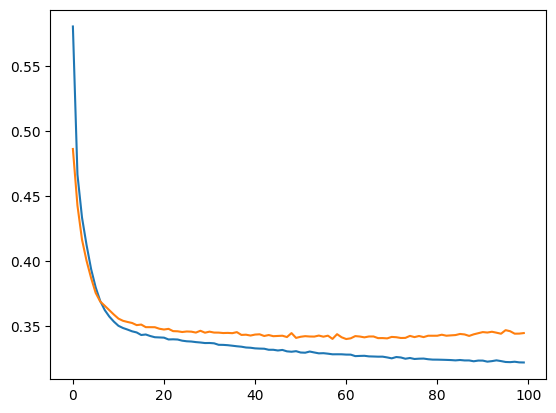

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

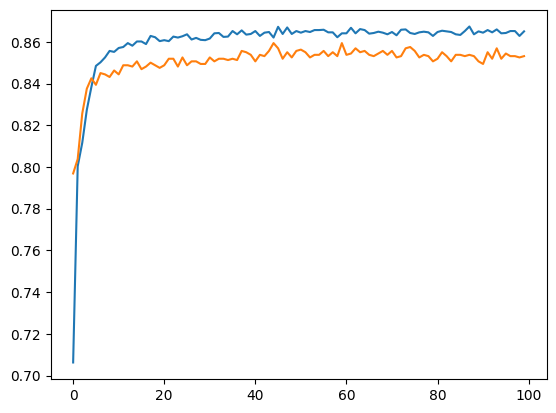

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])